### Bulls and Cows
---
You are playing the Bulls and Cows game with your friend.

You write down a secret number and ask your friend to guess what the number is. When your friend makes a guess, you provide a hint with the following info:

The number of "bulls", which are digits in the guess that are in the correct position.
The number of "cows", which are digits in the guess that are in your secret number but are located in the wrong position. Specifically, the non-bull digits in the guess that could be rearranged such that they become bulls.
Given the secret number secret and your friend's guess guess, return the hint for your friend's guess.

The hint should be formatted as "xAyB", where x is the number of bulls and y is the number of cows. Note that both secret and guess may contain duplicate digits.

|Input|Output|Explanation|
|:--|:--|:--|
|secret = "1807", guess = "7810"|"1A3B"||
|secret = "1123", guess = "0111"|"1A1B"||
>$Constraints:$  
>- $1 <= secret.length,$ $guess.length <= 1000$
>- $secret.length == guess.length$
>- $secret$ $and$ $guess$ $consist$ $of$ $digits$ $only.$

In [1]:
import java.time.Duration;
import java.time.Instant;
import java.util.stream.*;

class Solution {
    public String getHint(String secret, String guess) {
        Map<Character, Integer> secretMap = new HashMap<>(), guessMap = new HashMap<>();

        IntStream
            .iterate(0, i -> i + 1)
            .limit(secret.length())
            .filter(i -> secret.charAt(i) != guess.charAt(i))
            .forEach(i -> {
                secretMap.put(secret.charAt(i), secretMap.getOrDefault(secret.charAt(i), 0) + 1);
                guessMap.put(guess.charAt(i), guessMap.getOrDefault(guess.charAt(i), 0) + 1);
            });

        int bulls = secret.length() - secretMap.values().stream().reduce(0, Integer::sum);
        int cows = secretMap.keySet().stream()
        .filter(K -> guessMap.containsKey(K))
        .map(K -> Math.min(secretMap.getOrDefault(K,0), guessMap.getOrDefault(K,0)))
        .reduce(0, Integer::sum);

        return bulls + "A" + cows + "B";
    }
}

In [7]:
Solution solution = new Solution();
String secret = "1807", guess = "7810";

/* Measure execution time */
Instant start = Instant.now();
String answer = solution.getHint(secret, guess);
Instant finish = Instant.now();

answer;

1A3B

In [8]:
Duration.between(start, finish).toMillis();

19

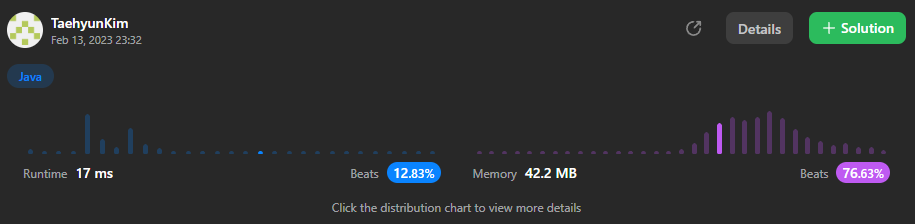

### One pass Java solution
---

In [4]:
public String getHint(String secret, String guess) {
    int bulls = 0;
    int cows = 0;
    int[] numbers = new int[10];
    for (int i = 0; i<secret.length(); i++) {
        if (secret.charAt(i) == guess.charAt(i)) bulls++;
        else {
            if (numbers[secret.charAt(i)-'0']++ < 0) cows++;
            if (numbers[guess.charAt(i)-'0']-- > 0) cows++;
        }
    }
    return bulls + "A" + cows + "B";
}

In [5]:
Solution solution = new Solution();
String secret = "1807", guess = "7810";

/* Measure execution time */
Instant start = Instant.now();
String answer = solution.getHint(secret, guess);
Instant finish = Instant.now();

answer;

1A3B

In [6]:
Duration.between(start, finish).toMillis();

25